In [298]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import cohen_kappa_score,plot_confusion_matrix,accuracy_score,mean_absolute_error,roc_curve,plot_roc_curve,roc_auc_score,mean_absolute_percentage_error,r2_score,mean_squared_error,recall_score,precision_score,classification_report

In [196]:
bnk = pd.read_csv('bank-dataset.csv')
bnk.head(8).T

,0,1,2,3,4,5,6,7
age,56,57,37,40,56,45,59,41
job,housemaid,services,services,admin.,services,services,admin.,blue-collar
marital,married,married,married,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school,basic.9y,professional.course,university.degree
default,no,no,no,no,no,no,no,no
housing,no,no,yes,no,no,no,no,no
loan,no,no,no,no,yes,no,no,no
contact,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon,mon,mon,mon


In [197]:
bnk.shape

(41188, 20)

In [198]:
bnk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [199]:
bnk.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [200]:
bnk.describe(include='object').T

,count,unique,top,freq
job,41188,11,admin.,10752
marital,41188,3,married,25008
education,41188,7,university.degree,13899
default,41188,2,no,41185
housing,41188,2,yes,22071
loan,41188,2,no,34940
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


In [201]:
bnk.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [202]:
bnk.duplicated().sum()

2103

In [203]:
bnk.duplicated().sum()*100/len(bnk)

5.105856074584831

In [204]:
df = bnk.copy()

In [205]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [206]:
df.previous.value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [207]:
df.drop_duplicates(keep='first',inplace=True)

In [208]:
df.duplicated().sum()

0

In [209]:
df_cat = df[['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']]
df_num = df[['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

In [210]:
df_cat.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,39085,39085,39085,39085,39085,39085,39085,39085,39085,39085,39085
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,mon,nonexistent,no
freq,10105,23698,13146,39082,20877,32919,24501,13169,8123,33547,34489


In [211]:
df_num.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,39085.000000,39085.000000,39085.000000,39085.000000,39085.00000,39085.000000,39085.000000,39085.000000,39085.000000
mean,40.122579,2.627325,960.561213,0.179992,0.05816,93.576412,-40.509285,3.594486,5165.737262
std,10.475910,2.823092,191.554022,0.504832,1.57931,0.584716,4.649560,1.744720,72.919772
min,17.000000,1.000000,0.000000,0.000000,-3.40000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.80000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.10000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.40000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,56.000000,999.000000,7.000000,1.40000,94.767000,-26.900000,5.045000,5228.100000


In [212]:
df_num.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0


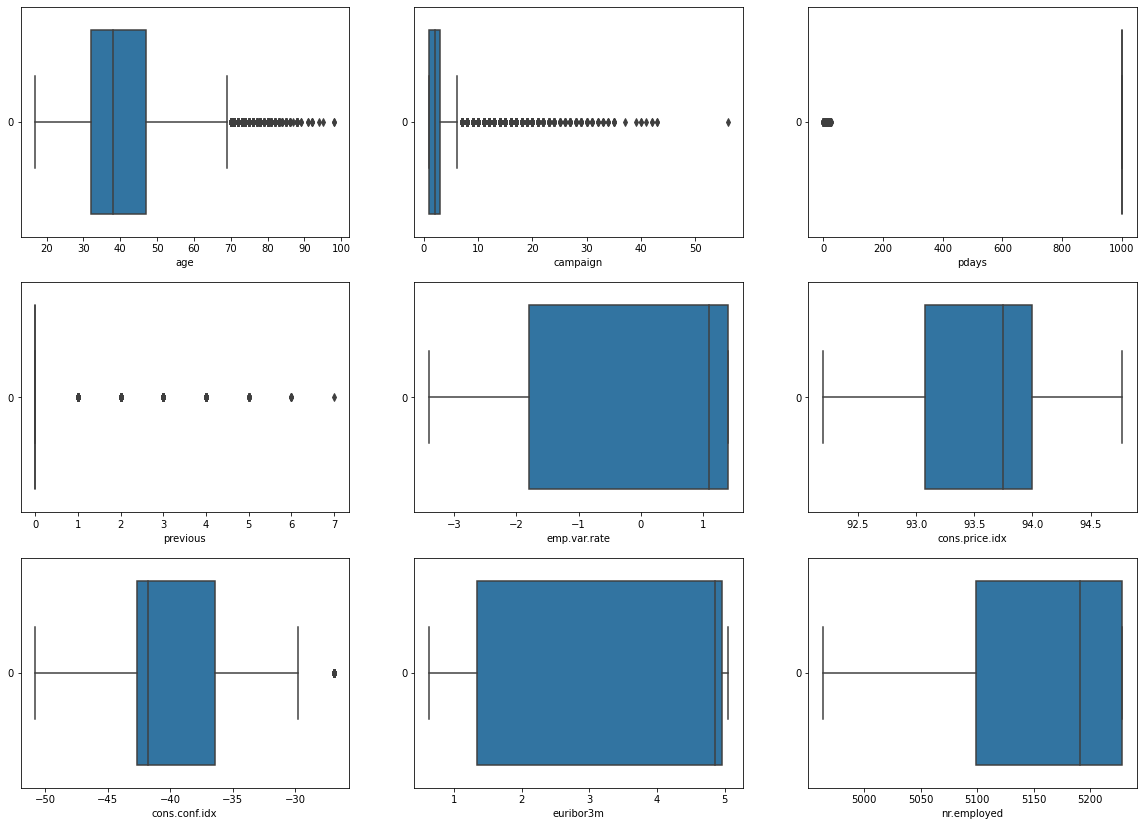

In [213]:
plt.figure(figsize=(20,60),facecolor='white')
plot_num=1
for i in df_num.columns:
    ax=plt.subplot(12,3,plot_num)
    sns.boxplot(data=df_num[i],orient='h')
    plt.xlabel(i)
    plot_num+=1
plt.show()

In [214]:
def trans_box(i):
    plt.figure(figsize=(20,10),facecolor='white')
    plt.subplot(2,3,1)
    sns.boxplot(data=df_num[i],orient='h')
    plt.title('Original')
    plt.xlabel(i)
    plt.subplot(2,3,2)
    sns.boxplot(data=np.sqrt(df_num[i]),orient='h')
    plt.title('Sqroot')
    plt.xlabel(i)
    plt.subplot(2,3,3)
    sns.boxplot(data=(df_num[i])**2,orient='h')
    plt.title('Square')
    plt.xlabel(i)
    plt.subplot(2,3,4)
    sns.boxplot(data=np.log(df_num[i]),orient='h')
    plt.title('Log')
    plt.xlabel(i)
    plt.subplot(2,3,5)
    sns.boxplot(data=np.cbrt(df_num[i]),orient='h')
    plt.title('Cuberoot')
    plt.xlabel(i)
    plt.show()

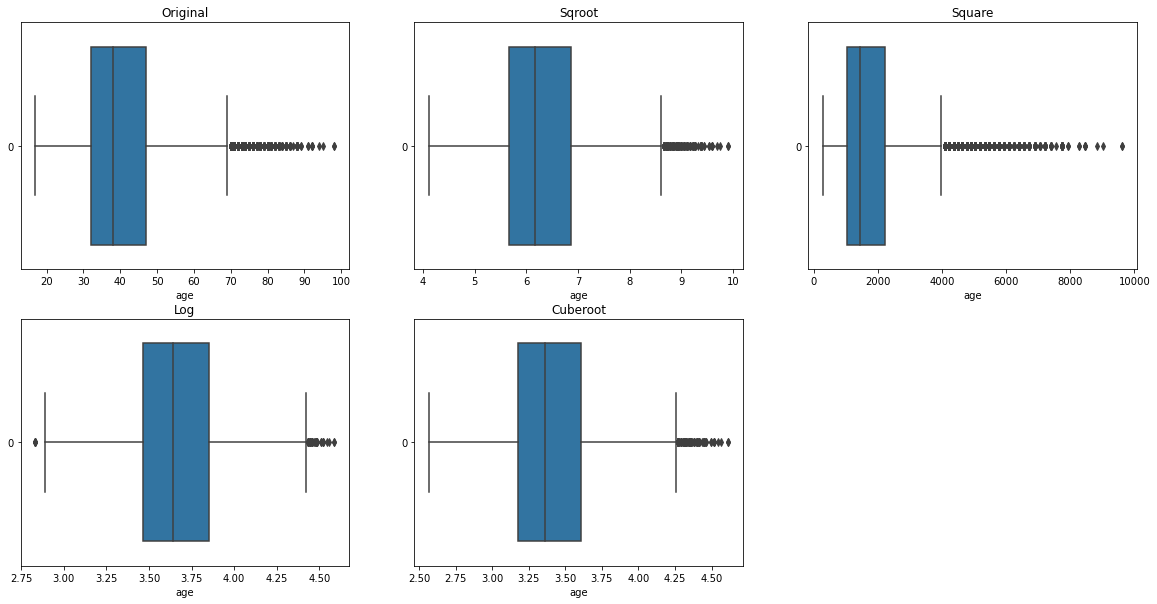

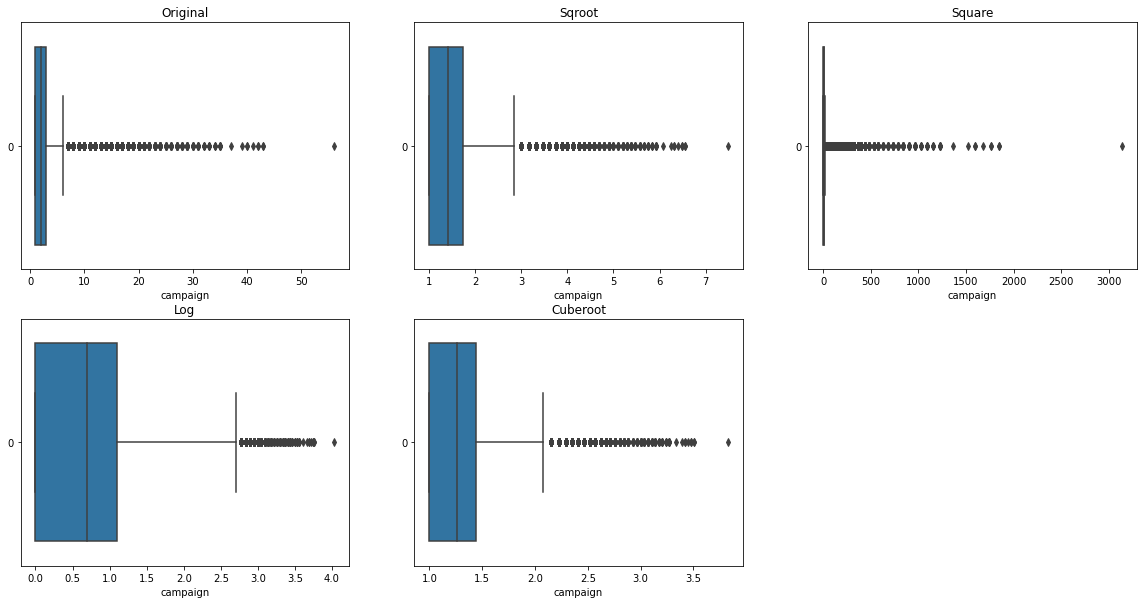

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


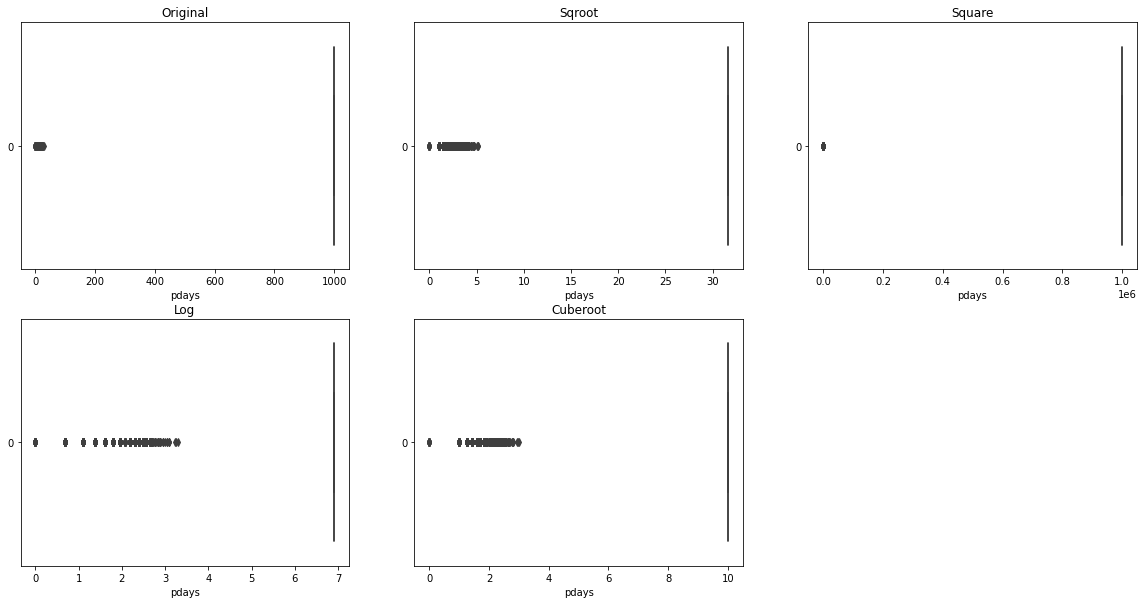

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


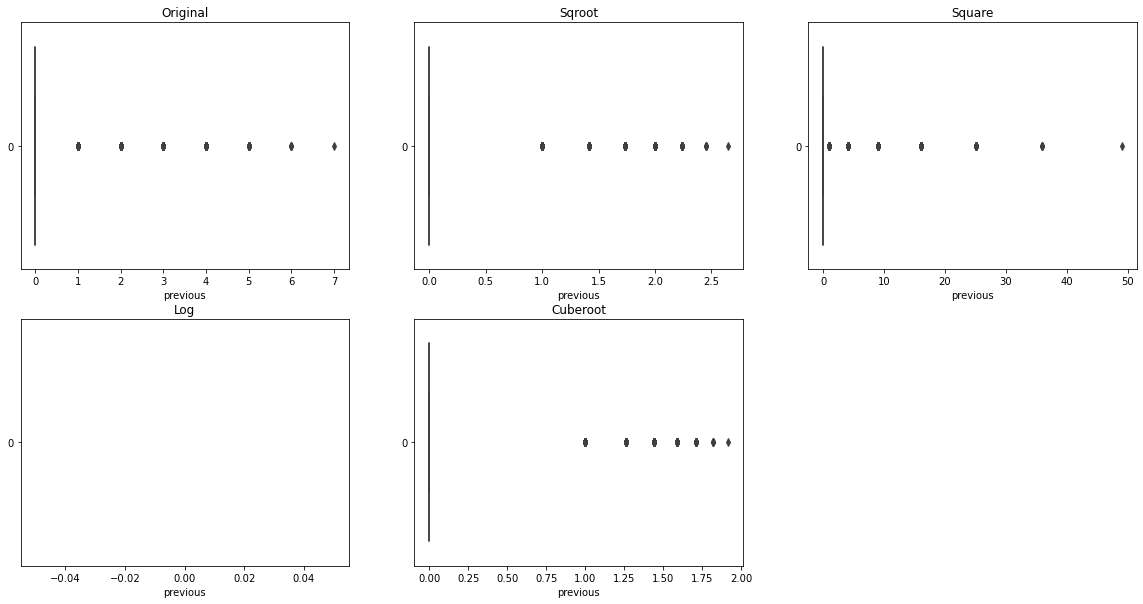

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


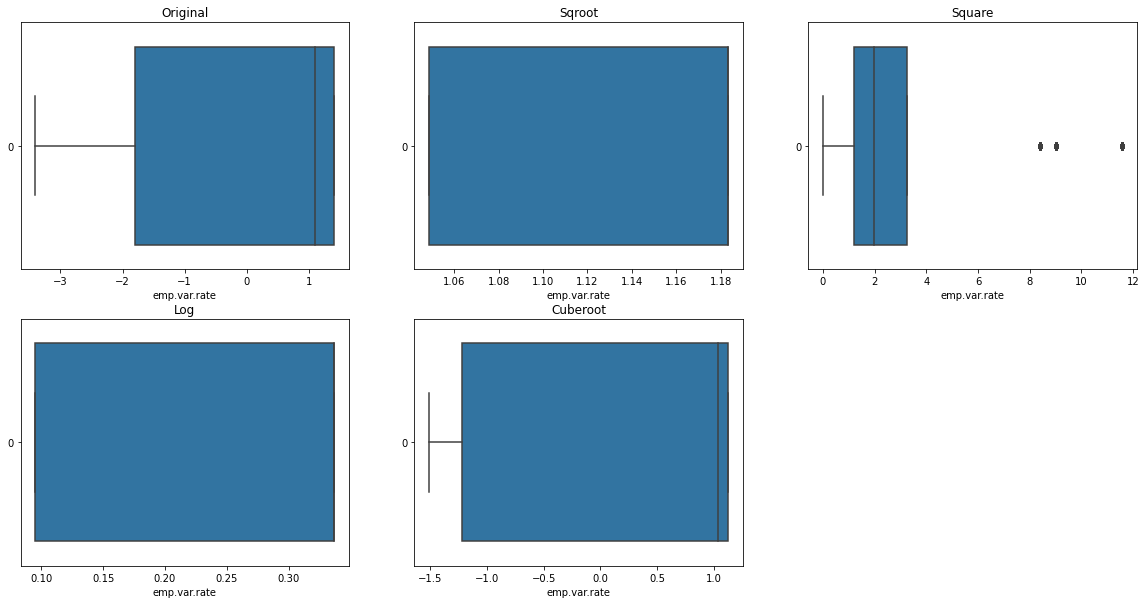

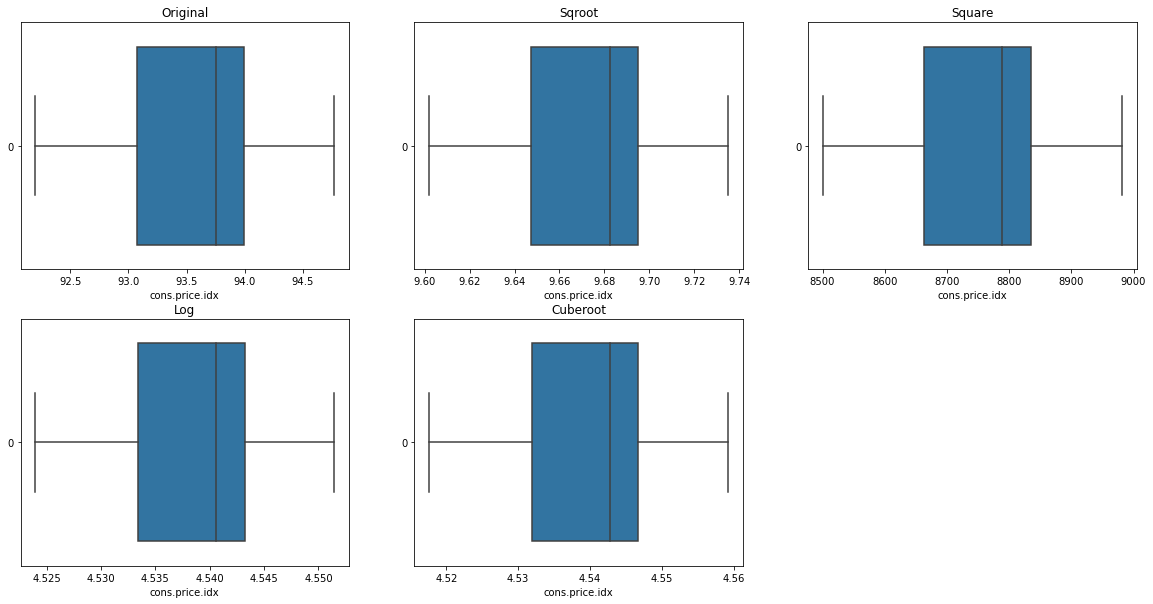

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


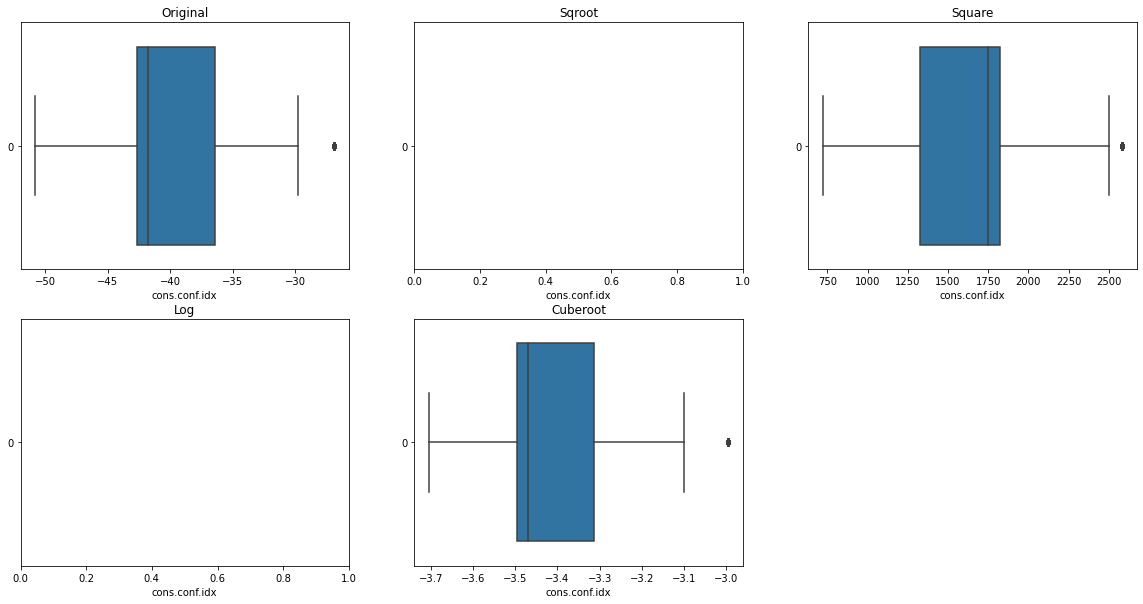

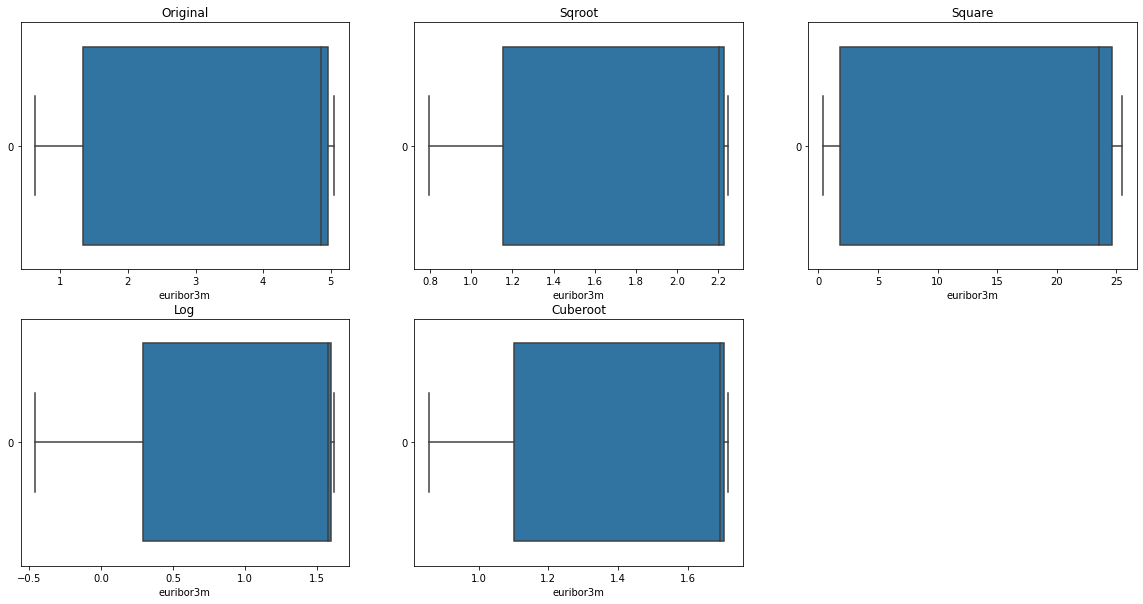

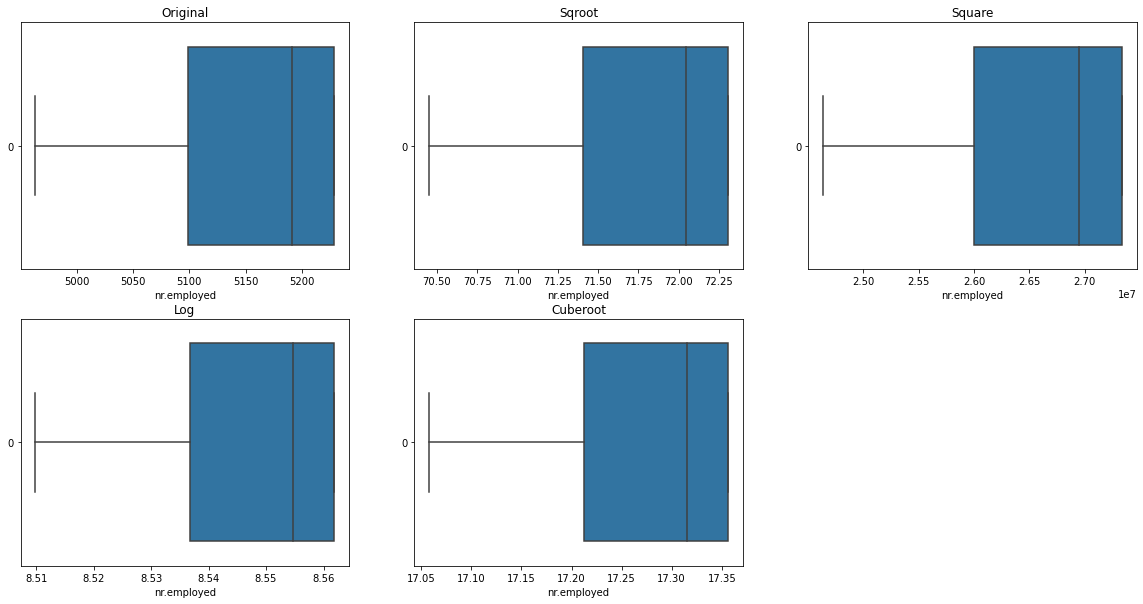

In [215]:
for i in df_num.columns:
    trans_box(i)

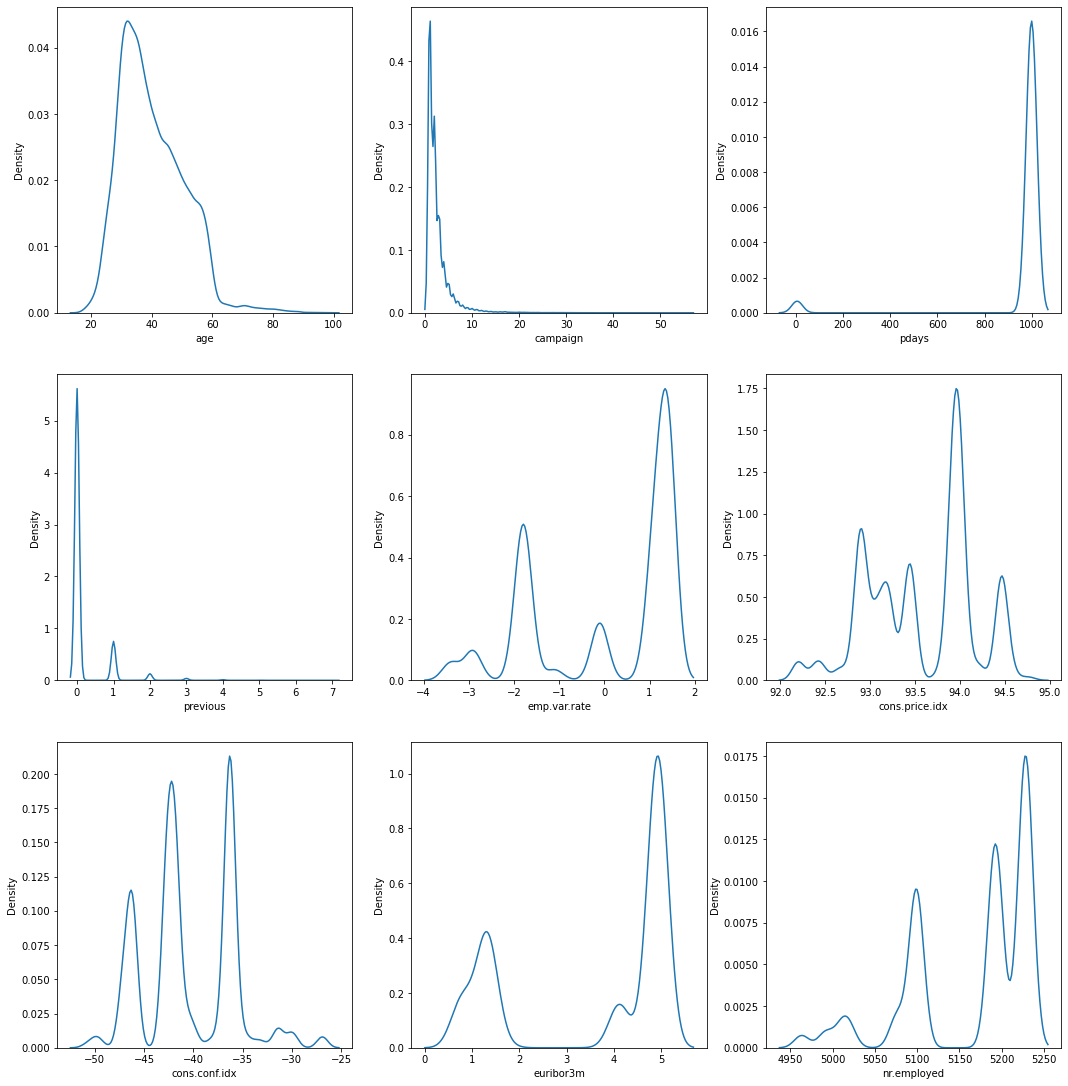

In [216]:
plt.figure(figsize=(18,80),facecolor='white') 
plot_num=1 
for i in df_num.columns: 
    ax=plt.subplot(12,3,plot_num) 
    sns.kdeplot(df_num[i]) 
    plot_num+=1  
plt.show()

In [217]:
def trans_kde(i):
    plt.figure(figsize=(18,10),facecolor='white')
    plt.subplot(2,3,1)
    sns.kdeplot(data=df_num[i])
    plt.title('Original')
    plt.xlabel(i)
    plt.subplot(2,3,2)
    sns.kdeplot(data=np.sqrt(df_num[i]))
    plt.title('Sqroot')
    plt.xlabel(i)
    plt.subplot(2,3,3)
    sns.kdeplot(data=(df_num[i])**2)
    plt.title('Square')
    plt.xlabel(i)
    plt.subplot(2,3,4)
    sns.kdeplot(data=np.log(df_num[i]))
    plt.title('Log')
    plt.xlabel(i)
    plt.subplot(2,3,5)
    sns.kdeplot(data=np.cbrt(df_num[i]))
    plt.title('Cuberoot')
    plt.xlabel(i)
    plt.show()

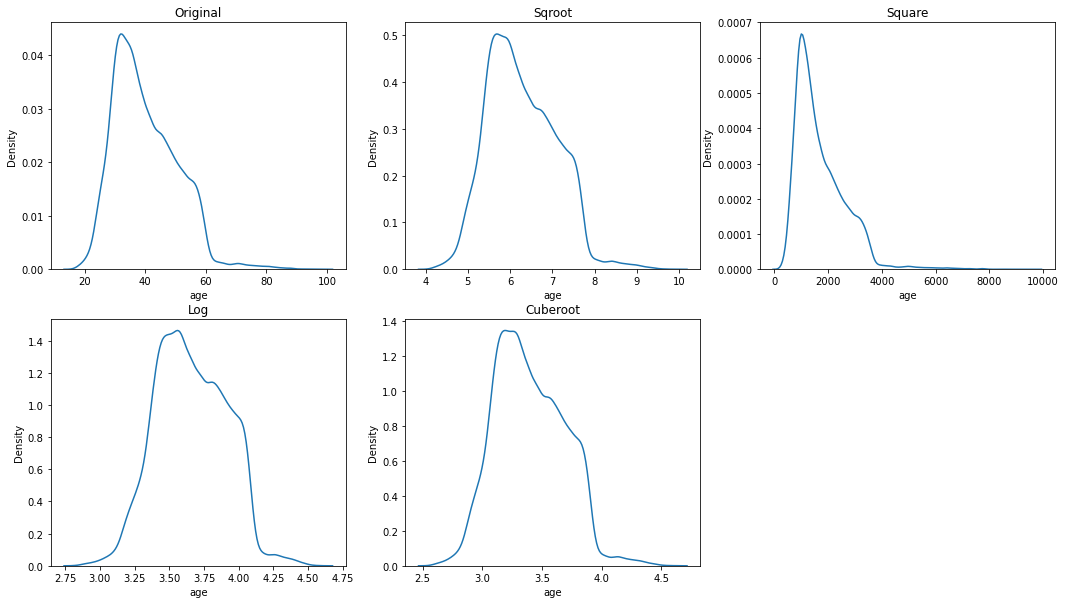

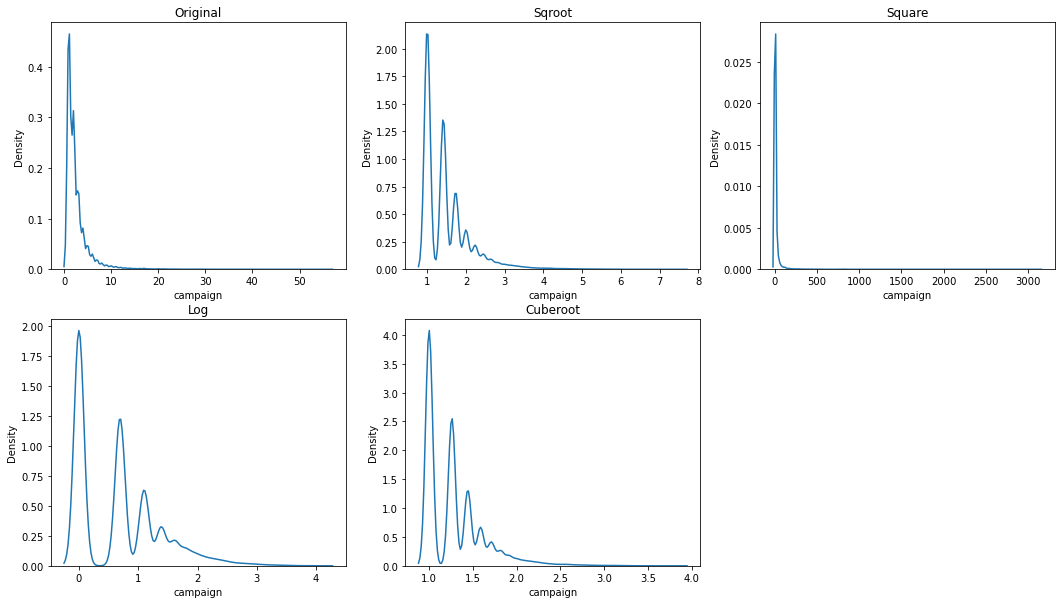

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


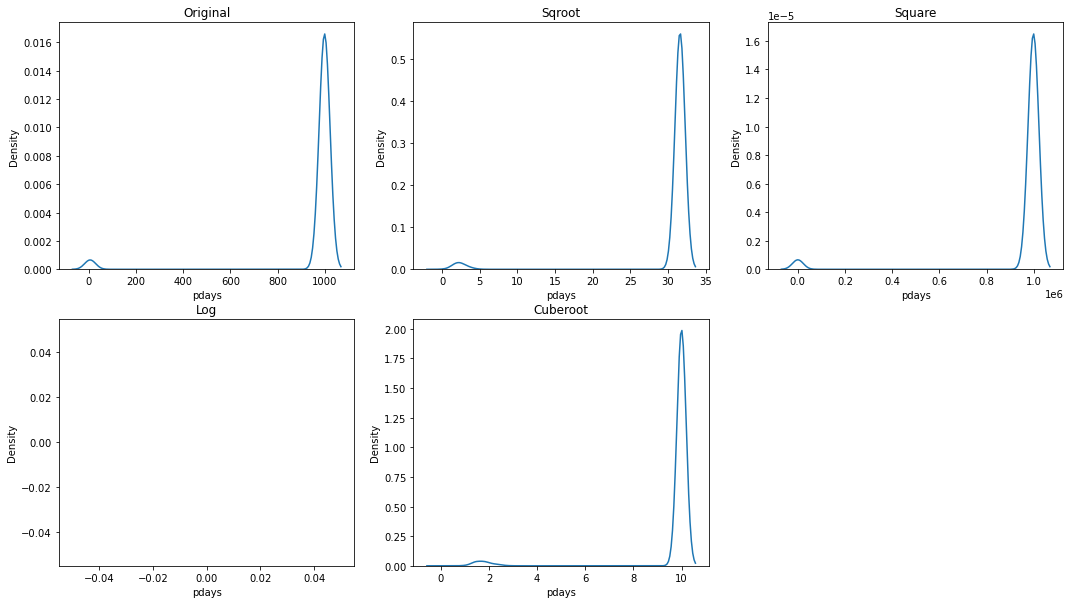

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


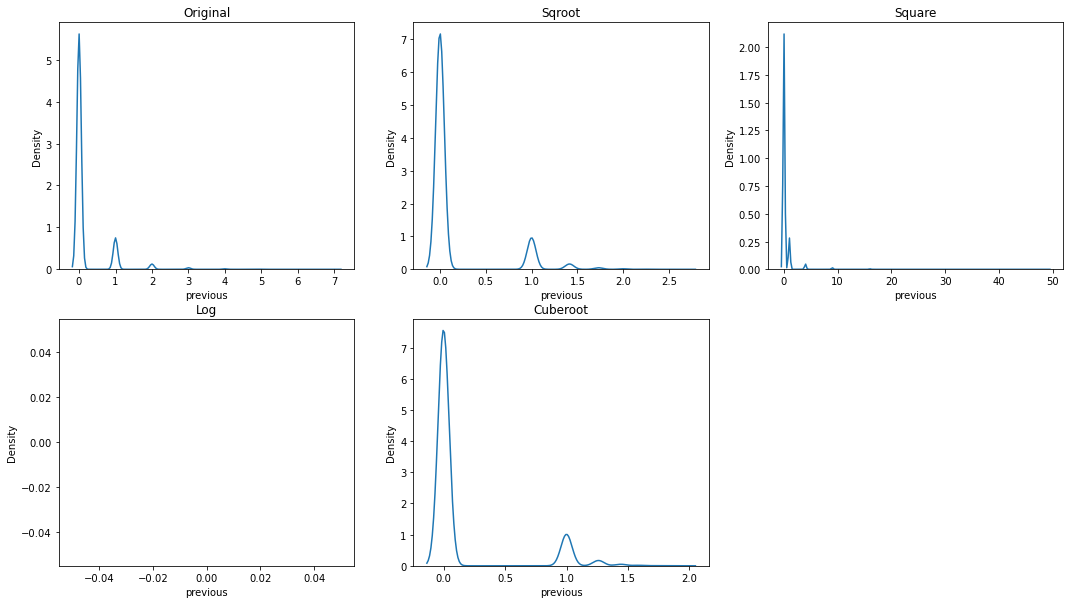

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


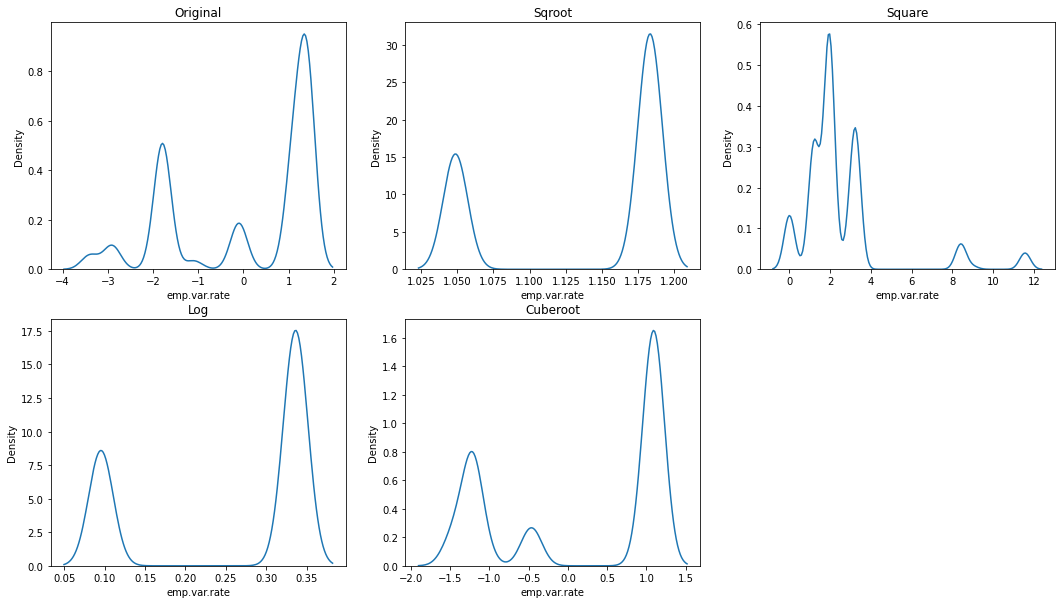

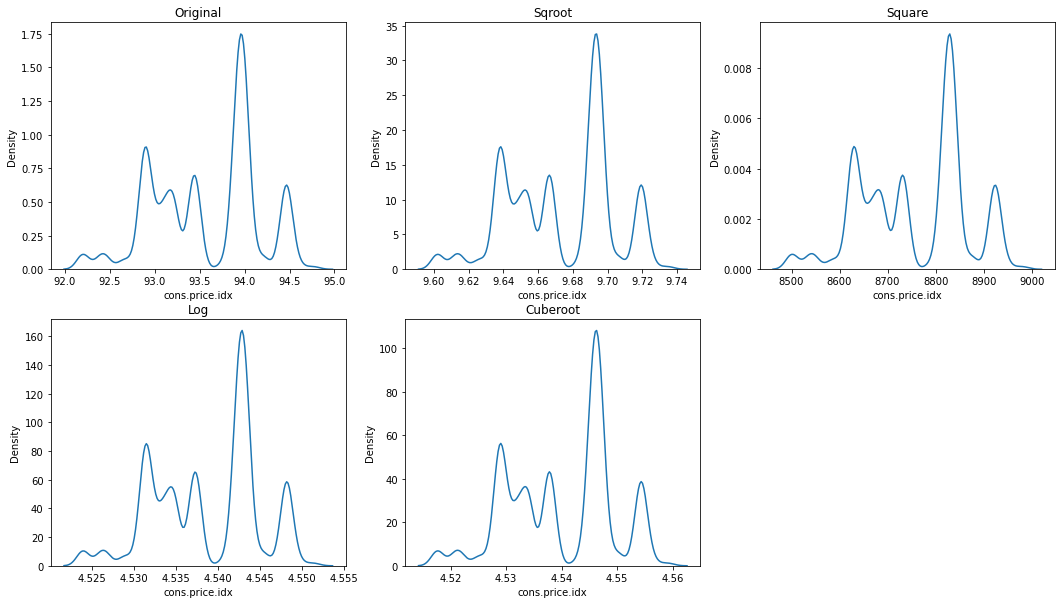

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


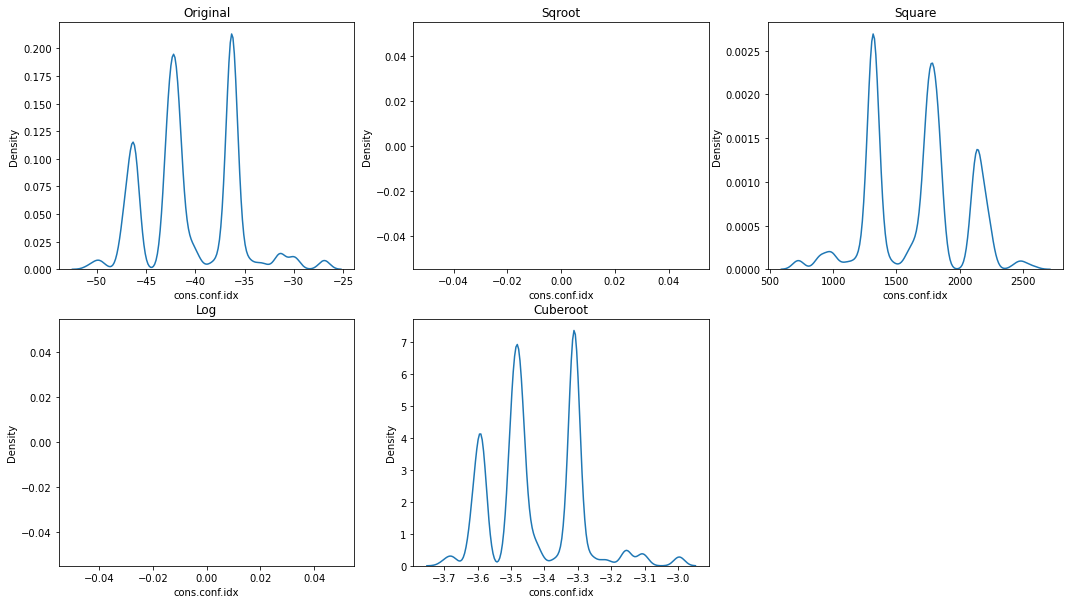

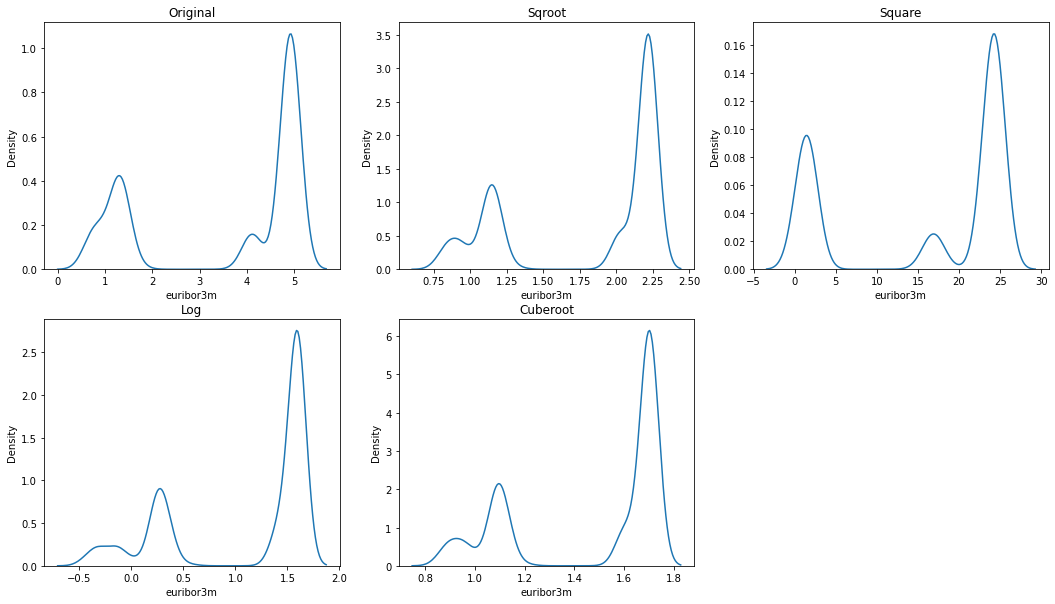

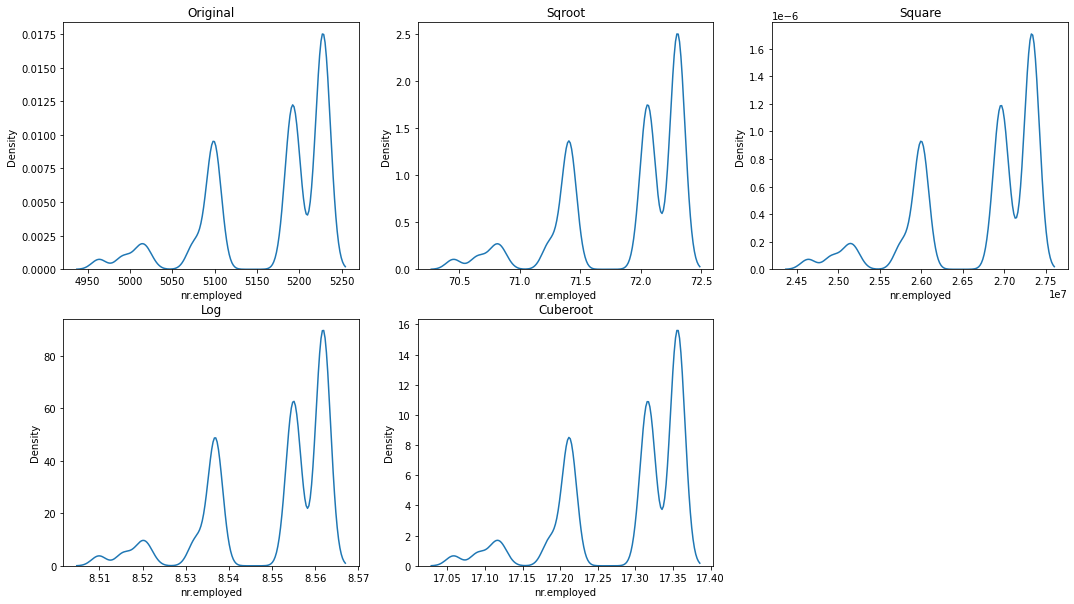

In [218]:
for i in df_num.columns:
    trans_kde(i)

In [219]:
df['age']=np.log(df['age'])
df['campaign']=np.log(df['campaign'])

In [220]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4.025352,housemaid,married,basic.4y,no,no,no,telephone,may,mon,0.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,4.043051,services,married,high.school,no,no,no,telephone,may,mon,0.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,3.610918,services,married,high.school,no,yes,no,telephone,may,mon,0.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3.688879,admin.,married,basic.6y,no,no,no,telephone,may,mon,0.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4.025352,services,married,high.school,no,no,yes,telephone,may,mon,0.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [221]:
df.y.value_counts()

no     34489
yes     4596
Name: y, dtype: int64

In [222]:
#Percentage of Term Deposit Subscribed or not
df.y.value_counts(normalize=True).mul(100).round(2)

no     88.24
yes    11.76
Name: y, dtype: float64

<Figure size 432x288 with 0 Axes>

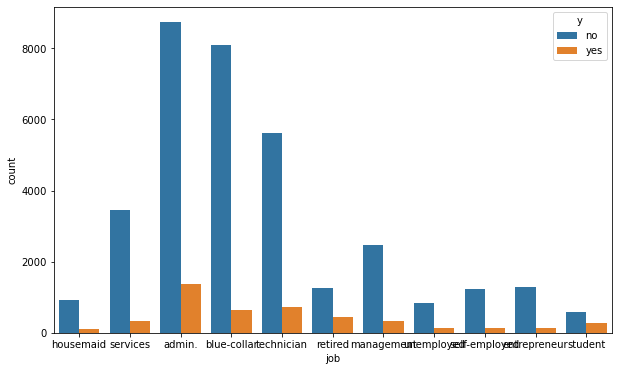

<Figure size 432x288 with 0 Axes>

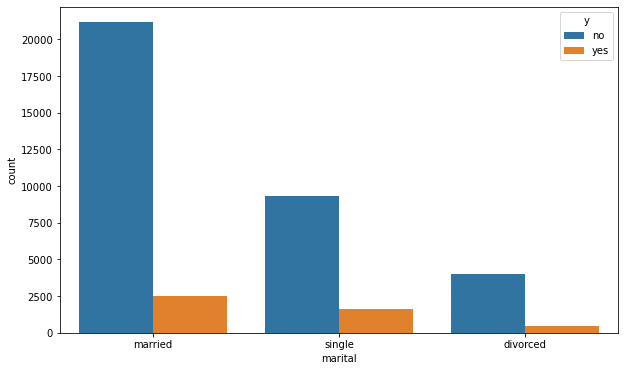

<Figure size 432x288 with 0 Axes>

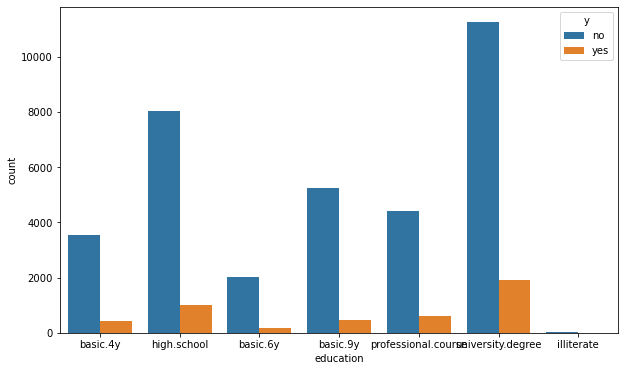

<Figure size 432x288 with 0 Axes>

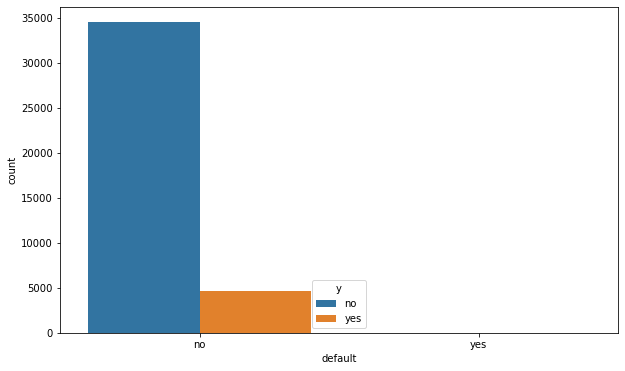

<Figure size 432x288 with 0 Axes>

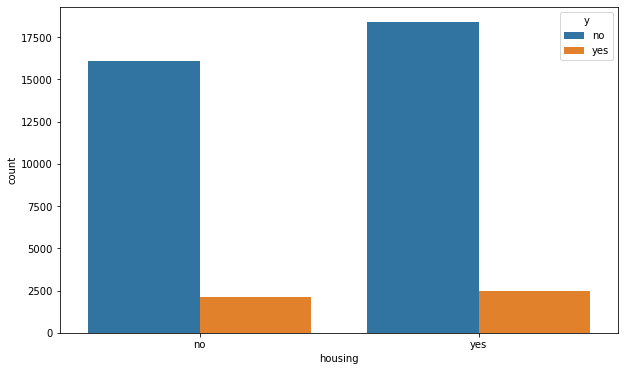

<Figure size 432x288 with 0 Axes>

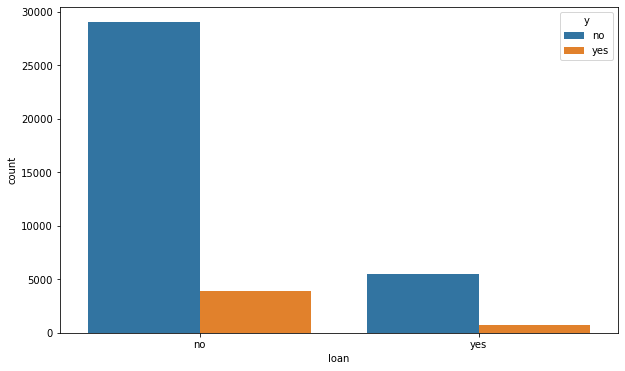

<Figure size 432x288 with 0 Axes>

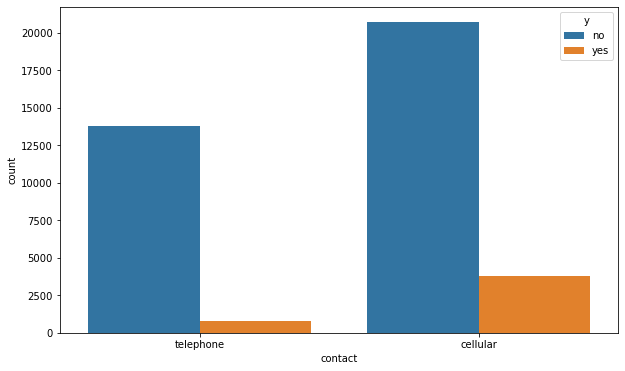

<Figure size 432x288 with 0 Axes>

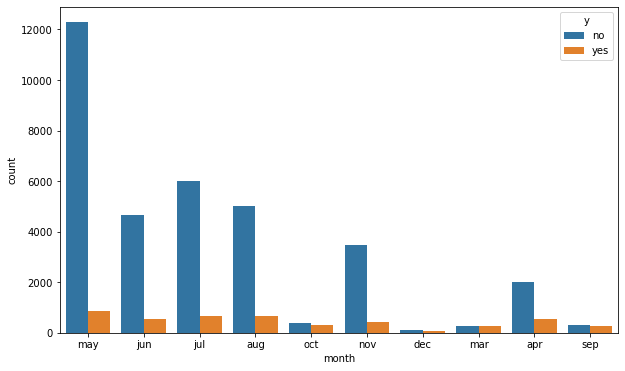

<Figure size 432x288 with 0 Axes>

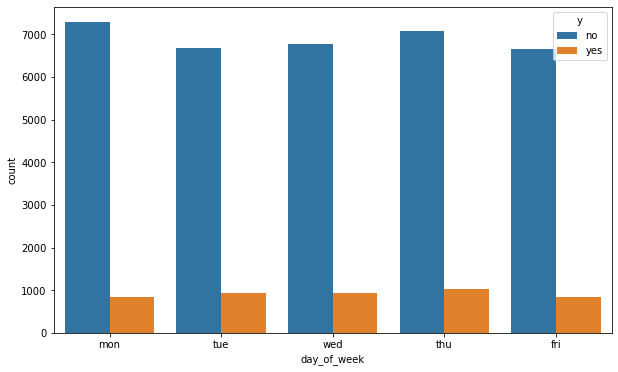

<Figure size 432x288 with 0 Axes>

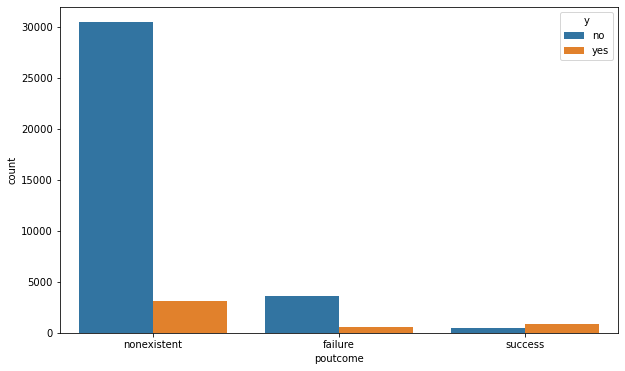

<Figure size 432x288 with 0 Axes>

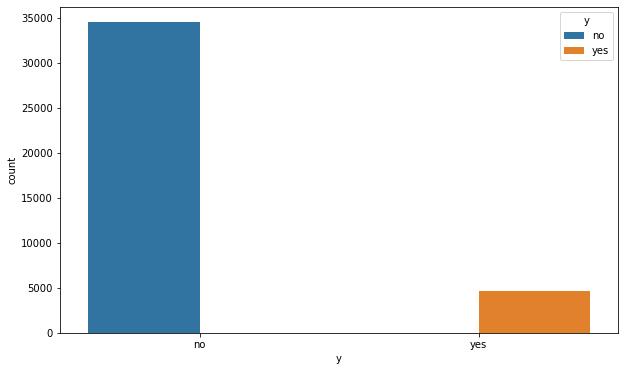

In [223]:
for i, predictor in enumerate(df.drop(columns=df_num.columns)):
    plt.figure(i)
    fig, ax = plt.subplots(figsize=(10,6))
    sns.countplot(x=predictor,hue='y',data=df,ax=ax)
    plt.show()

# Hypothesis Testing

## H0:- There is no relation ship b/w depndent variabel "term deposit y" and independent variable
## H1:- There is relation ship b/w depndent variabel "term deposit y" and independent variable

In [225]:
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy import stats
from statsmodels.stats.weightstats import ztest as ztest

In [226]:
chi2_contingency(pd.crosstab(df.y,df['age']))

(1563.2685291113835,
 1.3252856129835141e-275,
 77,
 array([[4.41205066e+00, 2.47074837e+01, 3.61788154e+01, 5.64742484e+01,
         8.73586030e+01, 1.18242958e+02, 1.87953358e+02, 3.85613228e+02,
         5.10915466e+02, 5.95626839e+02, 6.97104004e+02, 8.26818293e+02,
         1.19831296e+03, 1.41273862e+03, 1.59716234e+03, 1.54157050e+03,
         1.51686302e+03, 1.43568128e+03, 1.46303600e+03, 1.45862395e+03,
         1.25125757e+03, 1.17978235e+03, 1.19566573e+03, 9.75945606e+02,
         1.05359770e+03, 9.68003915e+02, 8.87704593e+02, 8.55937828e+02,
         9.24765818e+02, 8.64761929e+02, 7.86227427e+02, 8.23288653e+02,
         7.03280875e+02, 7.35930050e+02, 6.37100115e+02, 6.60925189e+02,
         6.25628783e+02, 5.82390687e+02, 5.54153563e+02, 6.00038890e+02,
         5.47976692e+02, 4.90620033e+02, 3.96202149e+02, 2.44427606e+02,
         6.44159396e+01, 5.47094282e+01, 4.76501471e+01, 4.85325572e+01,
         3.79436357e+01, 5.02973775e+01, 2.29426634e+01, 2.91195343e+01,

In [227]:
df_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [228]:
chi2_contingency(pd.crosstab(df.y,df.marital))

(118.76285023171489,
 1.625454228557162e-26,
 2,
 array([[ 3924.07785595, 20911.35530255,  9653.5668415 ],
        [  522.92214405,  2786.64469745,  1286.4331585 ]]))

In [229]:
chi2_contingency(pd.crosstab(df.y,df.education))

(193.44849020973118,
 4.701259358854969e-39,
 6,
 array([[3.48552002e+03, 1.94659675e+03, 5.04826836e+03, 7.99287097e+03,
         1.58833824e+01, 4.39969692e+03, 1.16001636e+04],
        [4.64479980e+02, 2.59403249e+02, 6.72731636e+02, 1.06512903e+03,
         2.11661763e+00, 5.86303083e+02, 1.54583641e+03]]))

In [230]:
chi2_contingency(pd.crosstab(df.y,df.default))

(0.0,
 1.0,
 1,
 array([[3.44863528e+04, 2.64723040e+00],
        [4.59564723e+03, 3.52769605e-01]]))

In [231]:
chi2_contingency(pd.crosstab(df.y,df.housing))

(1.184668796493371,
 0.2764075668891306,
 1,
 array([[16066.92367916, 18422.07632084],
        [ 2141.07632084,  2454.92367916]]))

In [232]:
chi2_contingency(pd.crosstab(df.y,df.loan))

(3.361282427462773,
 0.06674607152782143,
 1,
 array([[29048.05912754,  5440.94087246],
        [ 3870.94087246,   725.05912754]]))

In [233]:
chi2_contingency(pd.crosstab(df.y,df.contact))

(906.717794011156,
 3.3998443912809275e-199,
 1,
 array([[21619.93063835, 12869.06936165],
        [ 2881.06936165,  1714.93063835]]))

In [234]:
chi2_contingency(pd.crosstab(df.y,df.month))

(2903.4649622755296,
 0.0,
 9,
 array([[ 2230.7328131 ,  4990.91170526,   159.71623385,  5862.73291544,
          4608.8281182 ,   466.7949597 , 11620.4590252 ,  3427.28095177,
           623.86396316,   497.67931431],
        [  297.2671869 ,   665.08829474,    21.28376615,   781.26708456,
           614.1718818 ,    62.2050403 ,  1548.5409748 ,   456.71904823,
            83.13603684,    66.32068569]]))

In [235]:
chi2_contingency(pd.crosstab(df.y,df.day_of_week))

(29.158519085272175,
 7.25863306821863e-06,
 4,
 array([[6622.48803889, 7167.81750032, 7165.17026992, 6727.49484457,
         6806.0293463 ],
        [ 882.51196111,  955.18249968,  954.82973008,  896.50515543,
          906.9706537 ]]))

In [236]:
chi2_contingency(pd.crosstab(df.y,df.poutcome))

(3998.891159637997,
 0.0,
 2,
 array([[ 3677.00301906, 29602.21269029,  1209.78429065],
        [  489.99698094,  3944.78730971,   161.21570935]]))

In [237]:
df_num.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [238]:
## Age 
td_yes = df[df['y']=='yes']['age']
td_no = df[df['y']=='no']['age']

In [239]:
stats.mannwhitneyu(td_yes,td_no)

MannwhitneyuResult(statistic=77293500.0, pvalue=0.006291082303124163)

In [240]:
## campaign
td_yes = df[df['y']=='yes']['campaign']
td_no = df[df['y']=='no']['campaign']

In [241]:
stats.mannwhitneyu(td_yes,td_no)

MannwhitneyuResult(statistic=69075559.5, pvalue=5.998288920826207e-50)

In [242]:
## pdays
td_yes = df[df['y']=='yes']['pdays']
td_no = df[df['y']=='no']['pdays']

In [243]:
stats.mannwhitneyu(td_yes,td_no)

MannwhitneyuResult(statistic=63847548.0, pvalue=0.0)

In [244]:
ztest(td_yes,td_no)

(-67.82866237613274, 0.0)

In [245]:
## previous
td_yes = df[df['y']=='yes']['previous']
td_no = df[df['y']=='no']['previous']

In [246]:
stats.mannwhitneyu(td_yes,td_no)

MannwhitneyuResult(statistic=96457798.5, pvalue=0.0)

In [247]:
ztest(td_yes,td_no)

(46.51706893192803, 0.0)

In [248]:
## emp.var.rate
td_yes = df[df['y']=='yes']['emp.var.rate']
td_no = df[df['y']=='no']['emp.var.rate']

In [249]:
stats.mannwhitneyu(td_yes,td_no)

MannwhitneyuResult(statistic=45497622.0, pvalue=0.0)

In [250]:
ztest(td_yes,td_no)

(-61.640726396015175, 0.0)

In [251]:
stats.ttest_ind(td_yes,td_no)

Ttest_indResult(statistic=-61.64072639601518, pvalue=0.0)

In [252]:
## cons.price.idx
td_yes = df[df['y']=='yes']['cons.price.idx']
td_no = df[df['y']=='no']['cons.price.idx']

In [253]:
stats.mannwhitneyu(td_yes,td_no)

MannwhitneyuResult(statistic=61904057.0, pvalue=4.247121440913201e-131)

In [254]:
## cons.conf.idx
td_yes = df[df['y']=='yes']['cons.conf.idx']
td_no = df[df['y']=='no']['cons.conf.idx']

In [255]:
stats.mannwhitneyu(td_yes,td_no)

MannwhitneyuResult(statistic=85496737.0, pvalue=1.9054389554077435e-18)

In [256]:
## euribor3m
td_yes = df[df['y']=='yes']['euribor3m']
td_no = df[df['y']=='no']['euribor3m']

In [257]:
stats.mannwhitneyu(td_yes,td_no)

MannwhitneyuResult(statistic=41242308.0, pvalue=0.0)

In [258]:
## nr.employed
td_yes = df[df['y']=='yes']['nr.employed']
td_no = df[df['y']=='no']['nr.employed']

In [259]:
stats.mannwhitneyu(td_yes,td_no)

MannwhitneyuResult(statistic=40308932.5, pvalue=0.0)

In [260]:
# Because there is no co-relation b/w Gender and PhoneServices we are Dropping the columns Gender and PhoneServices
df.drop(columns=['default','housing','loan'],axis=1,inplace=True)

In [261]:
df.head()

,age,job,marital,education,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4.025352,housemaid,married,basic.4y,telephone,may,mon,0.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,4.043051,services,married,high.school,telephone,may,mon,0.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,3.610918,services,married,high.school,telephone,may,mon,0.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3.688879,admin.,married,basic.6y,telephone,may,mon,0.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4.025352,services,married,high.school,telephone,may,mon,0.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [262]:
df.describe(include='O')

,job,marital,education,contact,month,day_of_week,poutcome,y
count,39085,39085,39085,39085,39085,39085,39085,39085
unique,11,3,7,2,10,5,3,2
top,admin.,married,university.degree,cellular,may,mon,nonexistent,no
freq,10105,23698,13146,24501,13169,8123,33547,34489


In [263]:
from sklearn import preprocessing

d = preprocessing.normalize(df[['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']], axis=0)
df[['age','pdays','previous','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']] = pd.DataFrame(d,columns=['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'])
df.head()

,age,job,marital,education,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.005551,housemaid,married,basic.4y,telephone,may,mon,0.0,0.0,0.005159,nonexistent,0.003521,0.005081,-0.004515,0.006149,0.005082,no
1,0.005575,services,married,high.school,telephone,may,mon,0.0,0.0,0.005159,nonexistent,0.003521,0.005081,-0.004515,0.006149,0.005082,no
2,0.004979,services,married,high.school,telephone,may,mon,0.0,0.0,0.005159,nonexistent,0.003521,0.005081,-0.004515,0.006149,0.005082,no
3,0.005087,admin.,married,basic.6y,telephone,may,mon,0.0,0.0,0.005159,nonexistent,0.003521,0.005081,-0.004515,0.006149,0.005082,no
4,0.005551,services,married,high.school,telephone,may,mon,0.0,0.0,0.005159,nonexistent,0.003521,0.005081,-0.004515,0.006149,0.005082,no


In [264]:
df.month.value_counts()

may    13169
jul     6644
aug     5656
jun     5223
nov     3884
apr     2528
oct      707
sep      564
mar      529
dec      181
Name: month, dtype: int64

In [265]:
df.contact.value_counts()

cellular     24501
telephone    14584
Name: contact, dtype: int64

In [266]:
df.day_of_week.value_counts()

mon    8123
thu    8120
wed    7713
tue    7624
fri    7505
Name: day_of_week, dtype: int64

In [267]:
df.poutcome.value_counts()

nonexistent    33547
failure         4167
success         1371
Name: poutcome, dtype: int64

In [268]:
df = pd.get_dummies(df, columns=['job','education','marital'])
df['y'] = df['y'].map({'yes':1, 'no':0})
df['month'] = df['month'].map({'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7 , 'aug':8, 'sep':8, 'oct':10 , 'nov':11 , 'dec':12})
df['day_of_week'] = df['day_of_week'].map({'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5})
df['contact'] = df['contact'].map({'cellular':0 ,'telephone' : 1})

df = df.drop(df[df.poutcome == 'nonexistent' ].index, axis = 0, inplace = False)
df['poutcome'] = df['poutcome'].map({'failure':0 ,'success' : 1})

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5538 entries, 24013 to 41187
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            4301 non-null   float64
 1   contact                        5538 non-null   int64  
 2   month                          5538 non-null   int64  
 3   day_of_week                    5538 non-null   int64  
 4   campaign                       4301 non-null   float64
 5   pdays                          4301 non-null   float64
 6   previous                       4301 non-null   float64
 7   poutcome                       5538 non-null   int64  
 8   emp.var.rate                   4301 non-null   float64
 9   cons.price.idx                 4301 non-null   float64
 10  cons.conf.idx                  4301 non-null   float64
 11  euribor3m                      4301 non-null   float64
 12  nr.employed                    4301 non-nul

In [270]:
df.head()

,age,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,marital_divorced,marital_married,marital_single
24013,0.005367,1,10,2,0.0,0.003623,0.005159,0,-0.00032,0.005038,...,0,0,0,0,0,0,1,0,0,1
24019,0.004643,1,10,2,0.0,0.000000,0.005159,0,-0.00032,0.005038,...,0,0,0,1,0,0,0,0,1,0
24076,0.005475,1,11,3,0.0,0.003623,0.005159,0,-0.00032,0.005038,...,0,0,0,0,0,0,1,0,1,0
24102,0.004942,1,11,3,0.0,0.005743,0.005159,0,-0.00032,0.005038,...,0,0,0,1,0,0,0,0,1,0
24108,0.004942,1,11,3,0.0,0.003623,0.005159,1,-0.00032,0.005038,...,0,0,0,0,0,0,1,0,1,0


<AxesSubplot:>

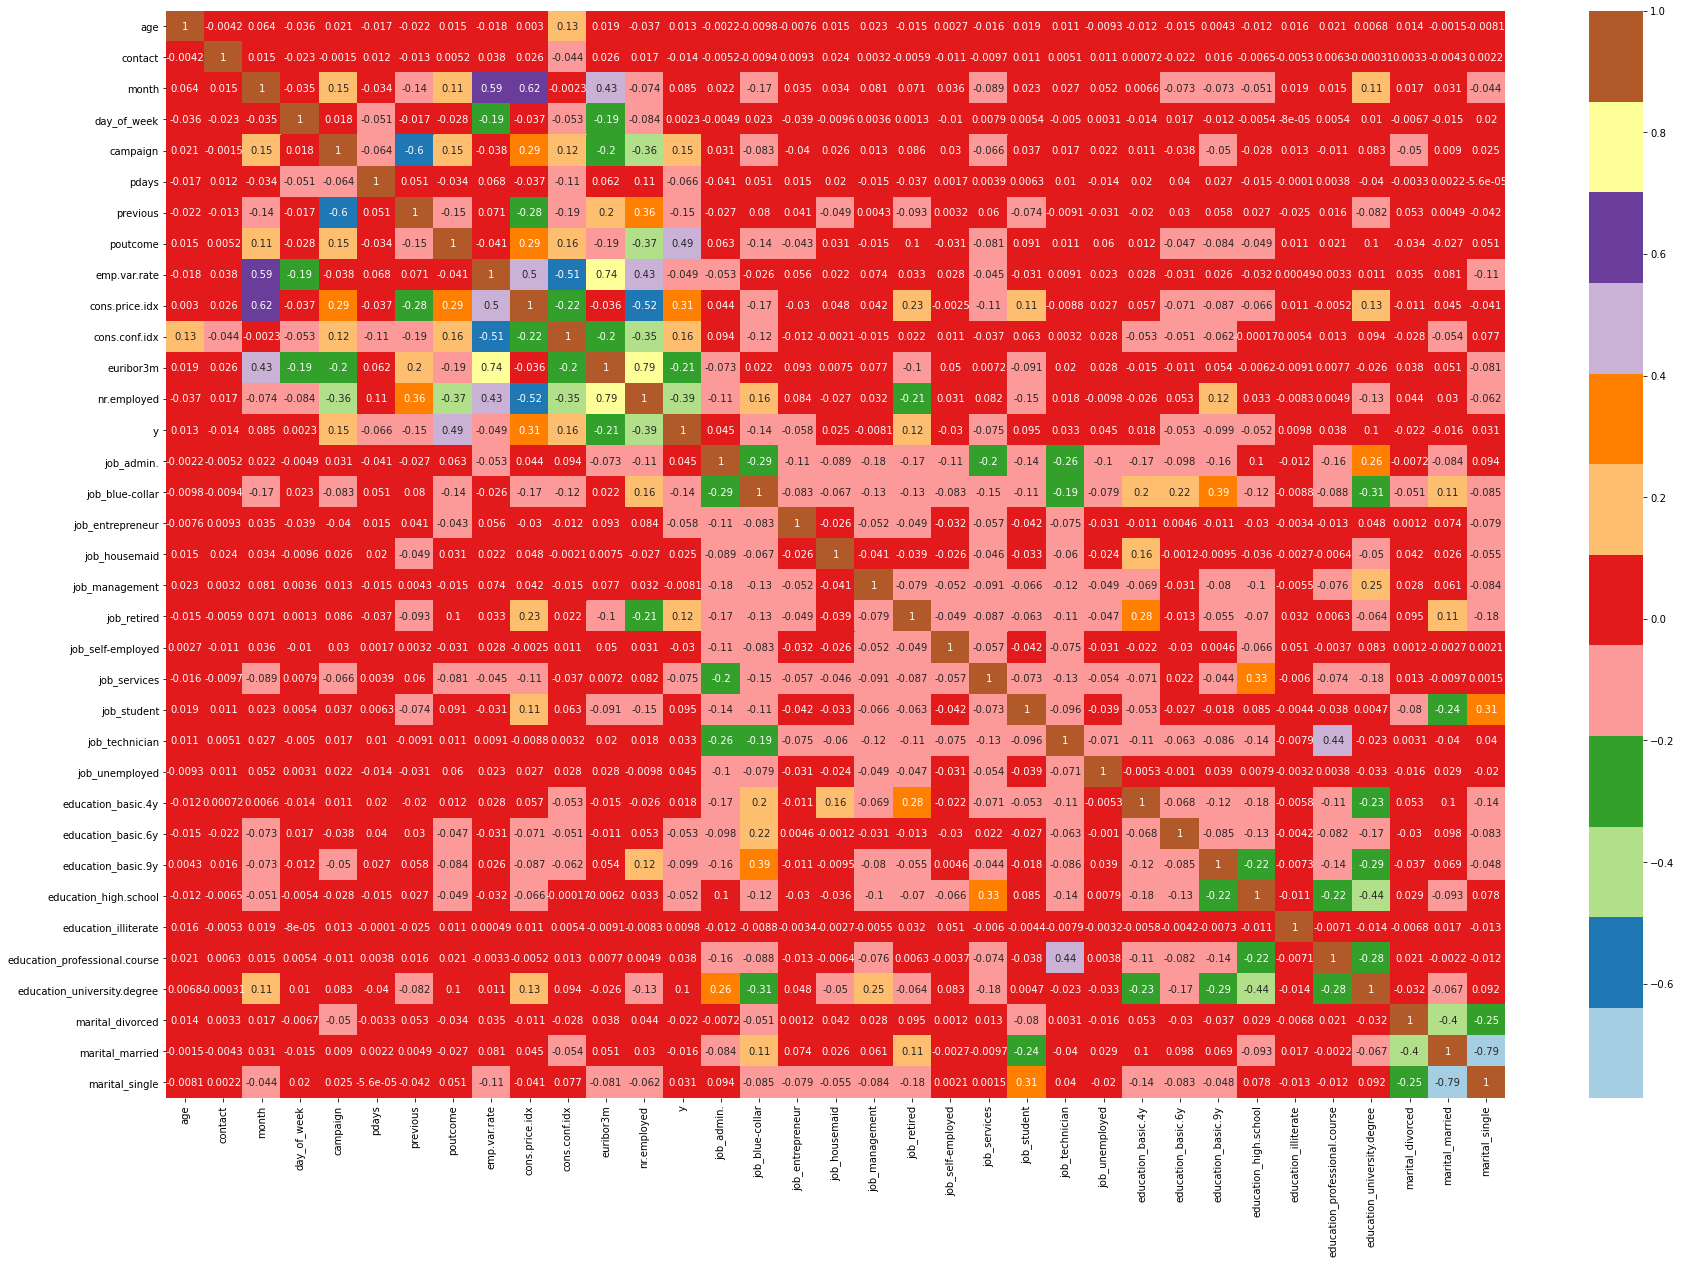

In [271]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),cmap='Paired',annot=True)

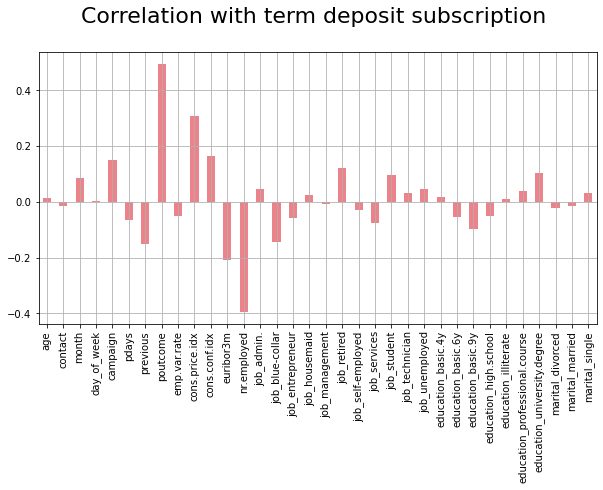

In [272]:
df1 = df[['age', 'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'marital_divorced', 'marital_married',
       'marital_single']]
correlations = df1.corrwith(df.y)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (10, 5), 
        fontsize = 10, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation with term deposit subscription \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.xticks(rotation = 90)
plt.show()

In [273]:
df.head()

,age,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,marital_divorced,marital_married,marital_single
24013,0.005367,1,10,2,0.0,0.003623,0.005159,0,-0.00032,0.005038,...,0,0,0,0,0,0,1,0,0,1
24019,0.004643,1,10,2,0.0,0.000000,0.005159,0,-0.00032,0.005038,...,0,0,0,1,0,0,0,0,1,0
24076,0.005475,1,11,3,0.0,0.003623,0.005159,0,-0.00032,0.005038,...,0,0,0,0,0,0,1,0,1,0
24102,0.004942,1,11,3,0.0,0.005743,0.005159,0,-0.00032,0.005038,...,0,0,0,1,0,0,0,0,1,0
24108,0.004942,1,11,3,0.0,0.003623,0.005159,1,-0.00032,0.005038,...,0,0,0,0,0,0,1,0,1,0


In [433]:
df.y.value_counts()

0    3512
1     789
Name: y, dtype: int64

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

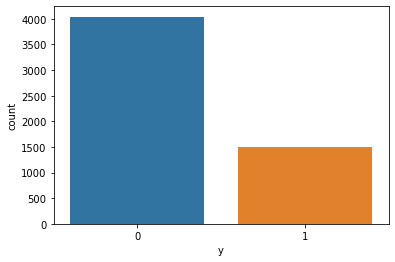

In [281]:
sns.countplot(df['y'])

In [306]:
df = df.reset_index()

In [328]:
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [331]:
df.head()

,index,age,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,...,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,marital_divorced,marital_married,marital_single
0,24013,0.005367,1,10,2,0.0,0.003623,0.005159,0,-0.00032,...,0,0,0,0,0,0,1,0,0,1
1,24019,0.004643,1,10,2,0.0,0.000000,0.005159,0,-0.00032,...,0,0,0,1,0,0,0,0,1,0
2,24076,0.005475,1,11,3,0.0,0.003623,0.005159,0,-0.00032,...,0,0,0,0,0,0,1,0,1,0
3,24102,0.004942,1,11,3,0.0,0.005743,0.005159,0,-0.00032,...,0,0,0,1,0,0,0,0,1,0
4,24108,0.004942,1,11,3,0.0,0.003623,0.005159,1,-0.00032,...,0,0,0,0,0,0,1,0,1,0


In [343]:
import sklearn
from sklearn.utils.validation import _assert_all_finite

# Balancing

In [344]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=69)
oversampled_X, oversampled_Y = sm.fit_resample(df.drop('y', axis=1), df['y'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [345]:
x = oversampled.drop('y',axis=1)
y = oversampled['y']

In [346]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for col in df_num:
    x[col] = sc.fit_transform(x[col].values.reshape(-1,1))

In [347]:
x.head()

,index,age,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,...,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,marital_divorced,marital_married,marital_single
0,24013,0.890885,1,10,2,-0.742583,0.312839,0.479945,0,2.247115,...,0,0,0,0,0,0,1,0,0,1
1,24019,-0.939080,1,10,2,-0.742583,-0.929946,0.479945,0,2.247115,...,0,0,0,1,0,0,0,0,1,0
2,24076,1.164657,1,11,3,-0.742583,0.312839,0.479945,0,2.247115,...,0,0,0,0,0,0,1,0,1,0
3,24102,-0.184719,1,11,3,-0.742583,1.039821,0.479945,0,2.247115,...,0,0,0,1,0,0,0,0,1,0
4,24108,-0.184719,1,11,3,-0.742583,0.312839,0.479945,1,2.247115,...,0,0,0,0,0,0,1,0,1,0


In [348]:
from sklearn.model_selection import train_test_split

In [349]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [432]:
ytrain.value_counts()

0    2474
1    2442
Name: y, dtype: int64

In [350]:
print('xtrain :',xtrain.shape)
print('xtest  :',xtest.shape)
print('ytrain :',ytrain.shape)
print('ytest  :',ytest.shape)

xtrain : (4916, 35)
xtest  : (2108, 35)
ytrain : (4916,)
ytest  : (2108,)


# KNN METHOD

In [351]:
knn=KNeighborsClassifier()

In [352]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [353]:
ypred=knn.predict(xtest)

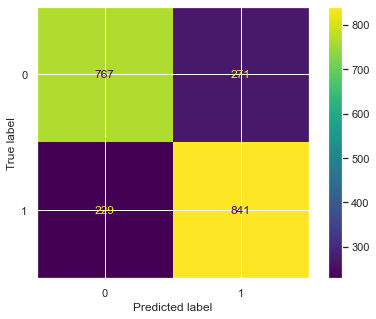

In [354]:
sns.set(rc={'figure.figsize':(7,5)})
plot_confusion_matrix(knn,xtest,ytest)
plt.show()

In [355]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75      1038
           1       0.76      0.79      0.77      1070

    accuracy                           0.76      2108
   macro avg       0.76      0.76      0.76      2108
weighted avg       0.76      0.76      0.76      2108



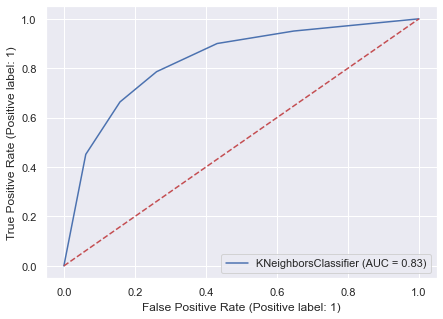

In [356]:
# Plotting ROC curve
plot_roc_curve(knn,xtest,ytest)
plt.plot([0,1],[0,1],color='r',ls='--')
plt.show()

In [357]:
mod=GridSearchCV(knn,{'n_neighbors':range(3,8),'metric':['eclidean','minkowski']},cv=5,scoring='roc_auc')

In [358]:
mod.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['eclidean', 'minkowski'],
                         'n_neighbors': range(3, 8)},
             scoring='roc_auc')

In [359]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [360]:
mod.best_params_

{'metric': 'minkowski', 'n_neighbors': 7}

In [361]:
mod.best_score_

0.8436615571069194

# model by selecting best parameters

In [362]:
knn1=KNeighborsClassifier(metric='minkowski',n_neighbors=7)
knn1.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=7)

In [363]:
ypred1=knn1.predict(xtest)

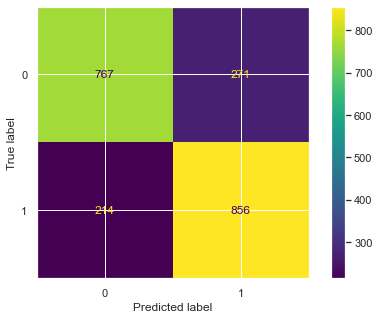

In [364]:
sns.set(rc={'figure.figsize':(8,5)})
plot_confusion_matrix(knn1,xtest,ytest)
plt.show()

In [366]:
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1038
           1       0.76      0.80      0.78      1070

    accuracy                           0.77      2108
   macro avg       0.77      0.77      0.77      2108
weighted avg       0.77      0.77      0.77      2108



In [367]:
roc_auc_score(ytest,knn1.predict_proba(xtest)[:,1])

0.8337628076999262

# Decision Tree Method

In [369]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=96,stratify=y)
print('x_train :',x_train.shape)
print('x_test  :',x_test.shape)
print('y_train :',y_train.shape)
print('y_test  :',y_test.shape)

x_train : (5619, 35)
x_test  : (1405, 35)
y_train : (5619,)
y_test  : (1405,)


In [426]:
dtc= DecisionTreeClassifier()

In [427]:
dtc.fit(x_train,y_train) 
y_predict2=dtc.predict(x_test)

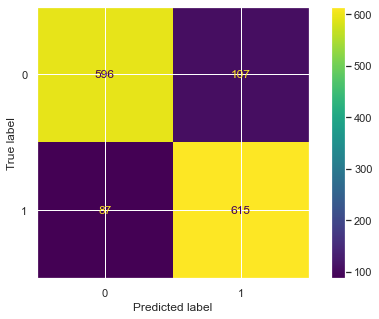

In [428]:
sns.set(rc={'figure.figsize':(8,5)})
plot_confusion_matrix(dtc,x_test,y_test)
plt.show()

In [429]:
print(classification_report(y_test,y_predict2))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       703
           1       0.85      0.88      0.86       702

    accuracy                           0.86      1405
   macro avg       0.86      0.86      0.86      1405
weighted avg       0.86      0.86      0.86      1405



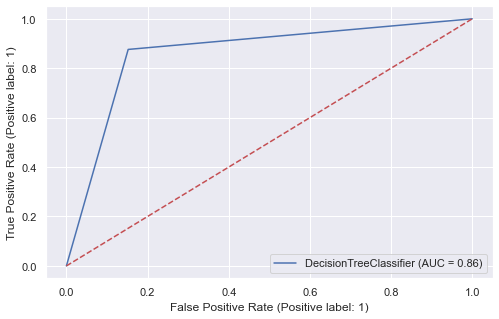

In [430]:
# Plotting ROC curve
plot_roc_curve(dtc,x_test,y_test)
plt.plot([0,1],[0,1],color='r',ls='--')
plt.show()

In [431]:
roc_auc_score(ytest,knn1.predict_proba(xtest)[:,1])

0.8337628076999262

In [375]:
mod=GridSearchCV(dtc,param_grid={'max_depth':[i for i in range(3,10)],'max_leaf_nodes':[i for i in range(5,11)],'min_samples_leaf':[i for i in range(10,30,5)]},cv=5)

In [376]:
mod.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'max_leaf_nodes': [5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [10, 15, 20, 25]})

In [377]:
mod.best_estimator_

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, min_samples_leaf=10)

In [378]:
mod.best_score_

0.809576376191125

In [420]:
dtc= DecisionTreeClassifier(max_depth=5,max_leaf_nodes=10,min_samples_leaf=10)

In [421]:
dtc.fit(x_train,y_train) 
y_predict2=dtc.predict(x_test)

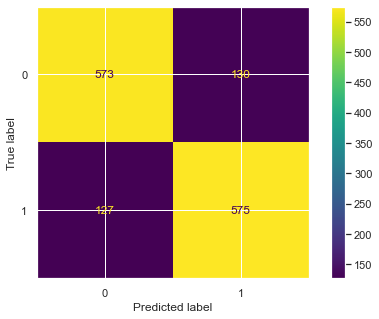

In [422]:
sns.set(rc={'figure.figsize':(8,5)})
plot_confusion_matrix(dtc,x_test,y_test)
plt.show()

In [423]:
print(classification_report(y_test,y_predict2))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       703
           1       0.82      0.82      0.82       702

    accuracy                           0.82      1405
   macro avg       0.82      0.82      0.82      1405
weighted avg       0.82      0.82      0.82      1405



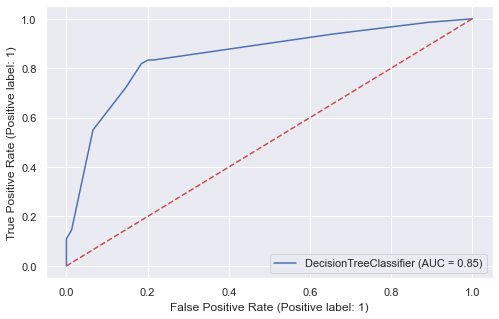

In [424]:
# Plotting ROC curve
plot_roc_curve(dtc,x_test,y_test)
plt.plot([0,1],[0,1],color='r',ls='--')
plt.show()

In [425]:
roc_auc_score(ytest,knn1.predict_proba(xtest)[:,1])

0.8337628076999262

# Random Forest Classifier

In [379]:
rfc=RandomForestClassifier(oob_score=True)

In [380]:
rfc.fit(x_train,y_train)

RandomForestClassifier(oob_score=True)

In [381]:
y_predict3=rfc.predict(x_test)

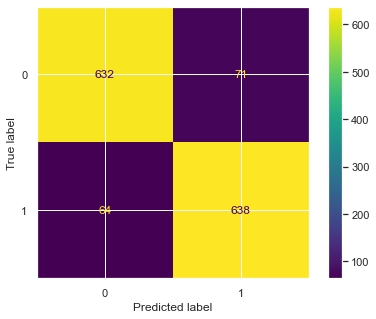

In [382]:
sns.set(rc={'figure.figsize':(7,5)})
plot_confusion_matrix(rfc,x_test,y_test)
plt.show()

In [383]:
rfc.oob_score_

0.8944652073322655

In [384]:
print(classification_report(y_test,y_predict3))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       703
           1       0.90      0.91      0.90       702

    accuracy                           0.90      1405
   macro avg       0.90      0.90      0.90      1405
weighted avg       0.90      0.90      0.90      1405



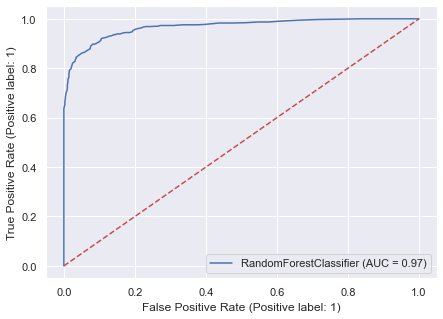

In [385]:
# Plotting ROC curve
plot_roc_curve(rfc,x_test,y_test)
plt.plot([0,1],[0,1],color='r',ls='--')
plt.show()

In [390]:
ls = []
for w in range(20,300,10):
    ran = RandomForestClassifier(oob_score=True,n_estimators=w,random_state=69)
    ran.fit(x_train,y_train)
    oob=ran.oob_score_
    ls.append((oob,w))

In [391]:
print(max(ls))

(0.8928634988432106, 210)


In [392]:
imp1=[]
for i in rfc.estimators_:
    imp1.append(i.feature_importances_)

In [393]:
feat_mean=np.mean(imp1,axis=0)
feat=pd.DataFrame({'features':x_train.columns,'imp_score':feat_mean})
feat.sort_values(by='imp_score',ascending=False)

,features,imp_score
0,index,0.132200
13,nr.employed,0.091196
12,euribor3m,0.090646
1,age,0.066017
6,pdays,0.062206
5,campaign,0.061367
10,cons.price.idx,0.047380
11,cons.conf.idx,0.032660
7,previous,0.031472
4,day_of_week,0.031160


# Bagging Classifier

In [394]:
bgc=BaggingClassifier(oob_score=True)

In [395]:
bgc.fit(x_train,y_train)

BaggingClassifier(oob_score=True)

In [396]:
y_predict4=bgc.predict(x_test)

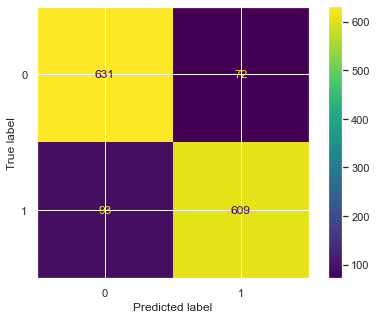

In [397]:
sns.set(rc={'figure.figsize':(7,5)})
plot_confusion_matrix(bgc,x_test,y_test)
plt.show()

In [398]:
bgc.oob_score_

0.8617191671115857

In [399]:
print(classification_report(y_test,y_predict4))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       703
           1       0.89      0.87      0.88       702

    accuracy                           0.88      1405
   macro avg       0.88      0.88      0.88      1405
weighted avg       0.88      0.88      0.88      1405



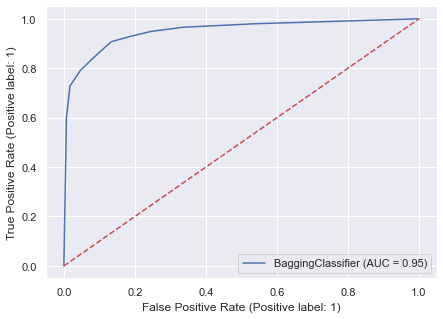

In [400]:
# Plotting ROC curve
plot_roc_curve(bgc,x_test,y_test)
plt.plot([0,1],[0,1],color='r',ls='--')
plt.show()

In [401]:
ls1 = []
for w in range(20,300,10):
    bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(),oob_score=True,n_estimators=w)
    bag.fit(x_train,y_train)
    oob=bag.oob_score_
    ls1.append((oob,w))

In [402]:
print(max(ls1))

(0.8966008186510055, 200)


In [403]:
imp=[]
for i in bgc.estimators_:
    imp.append(i.feature_importances_)

In [404]:
feat_mean=np.mean(imp,axis=0)
feat=pd.DataFrame({'features':x_train.columns,'imp_score':feat_mean})
feat.sort_values(by='imp_score',ascending=False)

,features,imp_score
13,nr.employed,0.194045
0,index,0.161673
1,age,0.069743
5,campaign,0.068822
6,pdays,0.067641
32,marital_divorced,0.063742
12,euribor3m,0.046426
8,poutcome,0.037323
34,marital_single,0.029548
7,previous,0.027836


# Ada Boost Classifier

In [405]:
ada=AdaBoostClassifier(n_estimators=25,random_state=69)

In [406]:
ada.fit(x_train,y_train)
y_predict5=ada.predict(x_test)

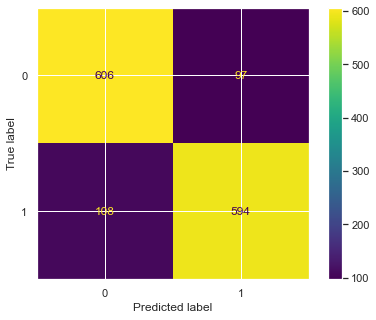

In [407]:
sns.set(rc={'figure.figsize':(7,5)})
plot_confusion_matrix(ada,x_test,y_test)
plt.show()

In [408]:
print(classification_report(y_test,y_predict5))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       703
           1       0.86      0.85      0.85       702

    accuracy                           0.85      1405
   macro avg       0.85      0.85      0.85      1405
weighted avg       0.85      0.85      0.85      1405



# Gradient Boosting Classifier

In [409]:
gbc=GradientBoostingClassifier(n_estimators=50,random_state=69)

In [410]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=50, random_state=69)

In [411]:
y_predgbc=gbc.predict(x_test)

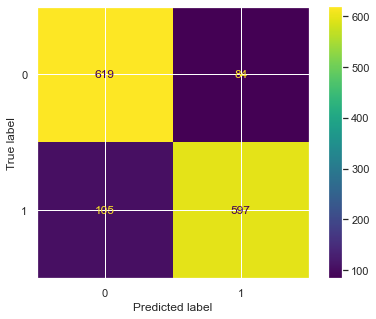

In [412]:
sns.set(rc={'figure.figsize':(7,5)})
plot_confusion_matrix(gbc,x_test,y_test)
plt.show()

In [413]:
print(classification_report(y_test,y_predgbc))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       703
           1       0.88      0.85      0.86       702

    accuracy                           0.87      1405
   macro avg       0.87      0.87      0.87      1405
weighted avg       0.87      0.87      0.87      1405



Since RandomForest is showing good ROC and accuracy it can be considered as best fit Modal out of all. Since ROC is independent of skewness of different classes and ratio of test and train sample. Result of ROC is considered as more genralize to fit.